# **CSE 7324 Lab 2: Exploring Image Data**
### *Thomas Adams, Suleiman Hijazeen, Nancy Le and Andrew Whigham*
------

We chose dataset on Kaggle website https://www.kaggle.com/grassknoted/asl-alphabet. The dataset is a collection of images for training of American Sign Language (ASL). It contains 87,000 images of 200x200 pixels each. There are 29 classes of 3000 images each from the English alphabets A-Z, SPACE, DELETE and NOTHING.

Based on National Center for Health Statistics https://www.startasl.com/american-sign-language, there are approximately 28 million Americans (10% of the population) with some degree of hearing loss, of which 2 million people are classified as deaf. Moreover, half a million deaf people in American and Canada are using ASL as their natural language. Nowadays, ASL becomes the third most common language in the United States.

Since there are a large population of hearing loss people, the ASL data is helpful in real life applications and in classifications. It creates a bridge between people with different languages to communicate, especially for the communication between hearing loss people and hearing people. Some companies provided service to help deaf people to communicate well with hearing people such as Sorenson Video Relay Service (SVRS). They are using a ASL interpreter, who is fluent in ASL and English or Spanish speaking, to relay the conversation between two parites. Moreover, ASL data is also useful for open capture movie industry. This type of movies use screening and assitive technology for deaf or hearing loss people.

Our prediction task for this dataset is to classify and link gestures with words and try to anticipate the following words based on the contex. We also can predict mistakes in performance which may lead to conversation misunderstanding. Our project can be the starting point for building a machine translator that can substitute interpreters to relay conversations between the deaf and hearing people. Companies like SVRS would be interested in our project. In the near future, our project can be used to build open capture for all of movies so that deaf and hard of hearing audience can enjoy watching normal movies without any obstacles.

### **2. Data Preparation**
------

In [53]:
# import dependencies

import sys
import os
from time import time
from time import sleep
from PIL import Image
import numpy as np
import pandas as pd
import plotly
from plotly.graph_objs import Bar, Line
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs.scatter import Marker
from plotly.graph_objs.layout import XAxis, YAxis
import seaborn as sns
from IPython.display import Image as _Imgdis
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn import datasets as ds
import cv2  

from PIL import Image

In [5]:
# helper functions to load and save images

def load_image(image):
    img = Image.open(image)
    img.load()
    npimage = np.asarray(img, dtype="int32")
    return npimage

def save_image(npimage, filename):
    img = Image.fromarray(np.asarray(np.clip(npimage, 0, 255), dtype="uint8"), "L")
    img.save(filename)


In [6]:
for root, dirs, files in os.walk('Data/Dataset/'):
    for file in files:
        print(file)

Working with 3000 images
Image examples before converted to gray scale : 
H1034.jpg


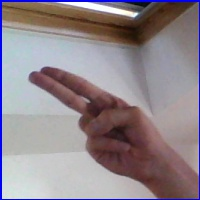

H1035.jpg


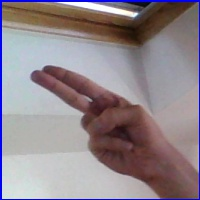

In [40]:
#show some images before converting it to gray scale 
folder ="C:/Users/sulem/Desktop/MachineLearningNotebooks-master/Dataset/asl_alphabet_train/H"


onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples before converted to gray scale : ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

In [8]:
num_of_img=300 #number of images imported per file 
n_components=800 # number of features after reduction

In [9]:
#importing images which will do the fellowing :
#1- for loop on every follder (latter) 
#2- from each file import a number of images 

from scipy import ndimage
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
x_flat = np.zeros((num_of_img*29,40000))
x_g= np.zeros((200,200))
# names of each file which represent the alphabet 
files=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']

i=0
for d in range(0,28): #going through the 29 files and fitch images from there 
 folder ="C:/Users/sulem/Desktop/MachineLearningNotebooks-master/Dataset/asl_alphabet_train"

 folder=folder+"/"+files[d]
 #onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
 onlyfiles = os.listdir(folder)

 f_n=0
 for _file in onlyfiles: #fitshing number of images from each file 
    train_files.append(_file) 
    f_n += 1
    if f_n>num_of_img:#limit the numbers of image per file 
        break
#    label_in_file = _file.find("_")
#    y_train.append(int(_file[label_in_file+1:-4]))
    
 print("Files in train_files: %d" % len(train_files))
 
 # Original Dimensions if any scaling is required 
 image_width = 200
 image_height = 200
 ratio = 1

 image_width = int(image_width / ratio)
 image_height = int(image_height / ratio)

 channels =3 #numbers of collors 
 nb_classes = 1

 dataset = np.ndarray(shape=(len(train_files),image_height, image_width,channels,),
                     dtype=np.float32)
 
 for _file in train_files:
    img = load_img(folder + "/"+ _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    #img = img.convert('LA')
    x = img_to_array(img) 
    for k in range(0, 199):
     x_g[k]=((x[k][:,0])*0.299)+((x[k][:,1])*0.587)+((x[k][:,2])*0.114 ) #converting to graye scal
    x_flat[i]=x_g.ravel() #flaten each image to 1d matrix 
    # Normalize
    #x = (x - 128.0) / 128.0
   # dataset[i] = x
    i += 1
    if i % len(train_files) == 0:
        print("%d images to array" % i)
print("All images to array!")


Files in train_files: 301
301 images to array
Files in train_files: 301
602 images to array
Files in train_files: 301
903 images to array
Files in train_files: 301
1204 images to array
Files in train_files: 301
1505 images to array
Files in train_files: 301
1806 images to array
Files in train_files: 301
2107 images to array
Files in train_files: 301
2408 images to array
Files in train_files: 301
2709 images to array
Files in train_files: 301
3010 images to array
Files in train_files: 301
3311 images to array
Files in train_files: 301
3612 images to array
Files in train_files: 301
3913 images to array
Files in train_files: 301
4214 images to array
Files in train_files: 301
4515 images to array
Files in train_files: 301
4816 images to array
Files in train_files: 301
5117 images to array
Files in train_files: 301
5418 images to array
Files in train_files: 301
5719 images to array
Files in train_files: 301
6020 images to array
Files in train_files: 301
6321 images to array
Files in train_f

In [32]:
n_samples, n_features = x_flat.shape
h, w,__ = x.shape
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("Original Image Sizes {} by {}".format(h,w))

n_samples: 8700
n_features: 40000
Original Image Sizes 200 by 200


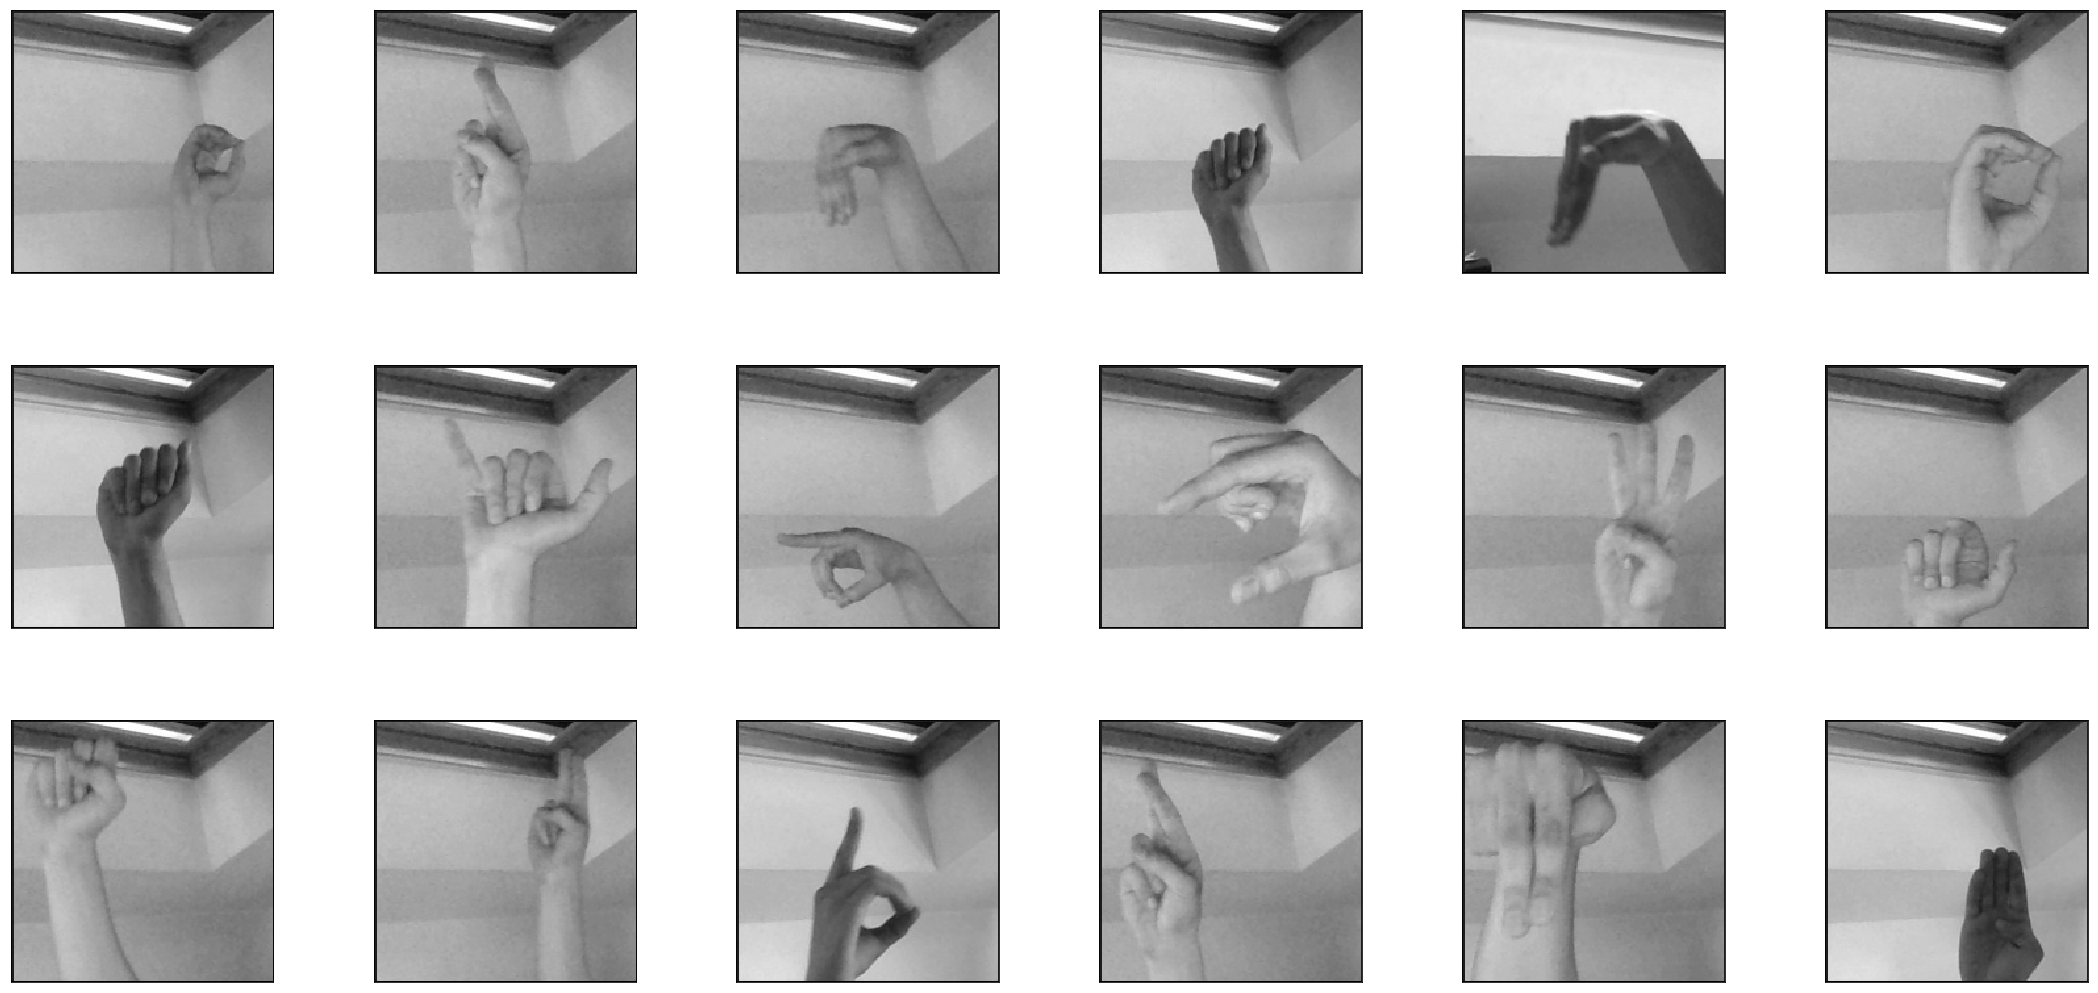

In [41]:
def plot_gallery(images,rnd, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(5 * n_col, 5 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[np.random.randint(rnd)].reshape((h, w)), cmap=plt.cm.gray)# pick radom images 
        plt.xticks(())
        plt.yticks(())

plot_gallery(x_flat,num_of_img*28, 200, 200) # number of totale images is number of files* number of images per file 

In [11]:
from sklearn.decomposition import PCA


print ("Extracting the top %d eigenfingers from %d images" % (
    n_components, x_flat.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(x_flat.copy())
eigenfingers = pca.components_.reshape((n_components, 200, 200))

Extracting the top 800 eigenfingers from 8700 images
Wall time: 56min 17s


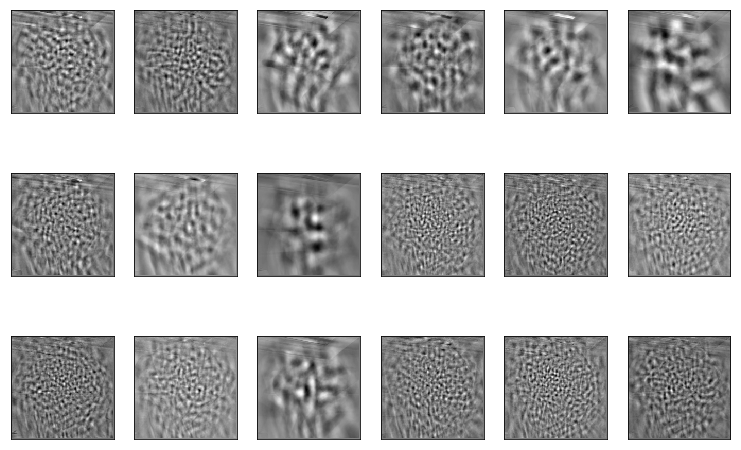

In [12]:
eigenfingers.shape
plot_gallery(eigenfingers,n_components, 200, 200)

In [13]:
from sklearn.decomposition import PCA


print ("Extracting the top %d eigenfingers from %d image" % (
    n_components, x_flat.shape[0]))

rpca = PCA(n_components=n_components,svd_solver='randomized')
%time rpca.fit(x_flat.copy())
eigenfingers = rpca.components_.reshape((n_components, 200, 200))

Extracting the top 800 eigenfingers from 8700 image
Wall time: 10min 3s


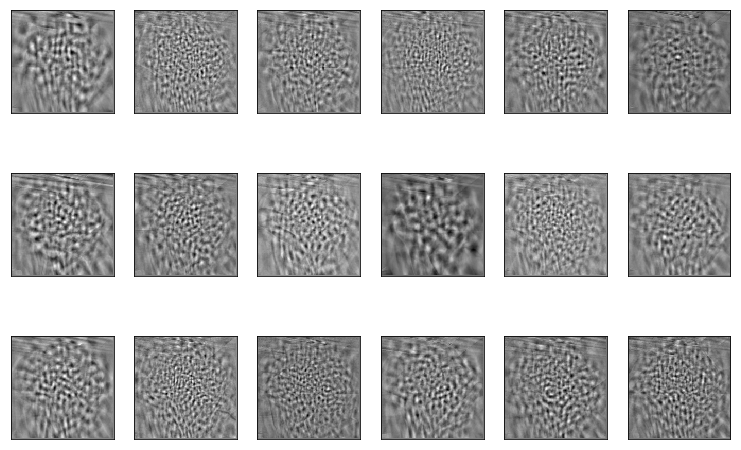

In [14]:
plot_gallery(eigenfingers, n_components, 200,200)

In [15]:
%%time
from sklearn.decomposition import KernelPCA


print ("Extracting the top %d eigenfingers from %d image, ALSO getting inverse transform" % (n_components,x_flat.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=12, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(x_flat)

Extracting the top 800 eigenfingers from 8700 image, ALSO getting inverse transform
Wall time: 5min 23s


In [ ]:
def plot_explained_variance(pca, ty):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title=ty), yaxis=YAxis(title='Explained variance ratio'))
    })
    
plot_explained_variance(pca,"Principal components PCA")
plot_explained_variance(rpca,"Principal components RPCA")

8700 images were imported having 40000 features each, using PCA and Random PCA it was reduced to 800 (the reason for picking this number is to have a wider range of companant to observe and descuss).

Above is the explained variance of each component for both PCA and Randomized PCA, components above 630 for both linear dimensionality reduction methods are not significant. It is worth mentioning that 300 comments were enough to get to 98% which in my opinion is a big number for basic images of hands. However, this big number can be a result of using a large number of pixels (200 by 200). Therefore, 300 comments are enough to reduce the number of features.


In [39]:
from ipywidgets import widgets  # make this interactive!
import warnings
# warnings.simplefilter('ignore', DeprecationWarning)
# warnings.simplefilter("always",DeprecationWarning)
from skimage import measure
def mse(imageA, imageB):# a function for mean squre erorr
 # the 'Mean Squared Error' between the two images is the
 # sum of the squared difference between the two images;
 # NOTE: the two images must have the same dimension
 err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
 err /= float(imageA.shape[0] * imageA.shape[1])
 
 # return the MSE, the lower the error, the more "similar"
 # the two images are
 return err
h=200
w=200

def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,4,1)
    plt.imshow(x_flat[idx_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)

    plt.grid()
    
    plt.subplot(1,4,2)
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    ssim = measure.compare_ssim(x_flat[idx_to_reconstruct].reshape((h, w)),reconstructed_image.reshape((h, w)))
    m = mse(x_flat[idx_to_reconstruct].reshape((h, w)),reconstructed_image.reshape((h, w)))
    plt.title("Full PCA %f ssim \n %f mse " % (ssim, m))
    plt.grid()
    
    plt.subplot(1,4,3)
    plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
    ssim = measure.compare_ssim(x_flat[idx_to_reconstruct].reshape((h, w)),reconstructed_image_rpca.reshape((h, w)))
    m = mse(x_flat[idx_to_reconstruct].reshape((h, w)),reconstructed_image_rpca.reshape((h, w)))
    plt.title("Randomized PCA %f ssim \n %f mse " % (ssim, m))
    plt.grid()
    
    plt.subplot(1,4,4)
    plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
    ssim = measure.compare_ssim(x_flat[idx_to_reconstruct].reshape((h, w)),reconstructed_image_kpca.reshape((h, w)))
    m = mse(x_flat[idx_to_reconstruct].reshape((h, w)),reconstructed_image_kpca.reshape((h, w)))
    plt.title("Kernel PCA %f ssim \n %f mse " % (ssim, m))
    plt.grid()
    
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,(num_of_img*29)-1,1),__manual=True)

interactive(children=(IntSlider(value=4349, description='idx_to_reconstruct', max=8699), Output()), _dom_class…

<function __main__.plt_reconstruct(idx_to_reconstruct)>

#### Two methods can be used to compare dimensionality reduction :

1- Mean Squared Error (MSE): is very simple to implement — but when using it for similarity, we can run into problems. The main one is the large distances between pixel intensities, which do not necessarily mean the contents of the images are dramatically different. It’s important to note that a value of 0 for MSE indicates perfect similarity. A value greater than one implies less similarity. This value will continue to grow as the average difference between pixel intensities increases.

2-Structural Similarity Measure (SSIM): is more involved than the MSE method, it attempts to model the perceived change in the structural information of the image, whereas MSE is actually estimating the perceived errors. There is a subtle difference between the two, but the results are dramatic.

Furthermore, the equation for SSIM is used to compare two windows (i.e. small sub-samples) rather than the entire image as in MSE. Doing this leads to a more robust approach that is able to account for changes in the structure of the image, rather than just the perceived change.

SSIM value can vary between -1 and 1, where 1 indicates perfect similarity.

#### Conclusions from the plots above:

1- PCA and randomize PCA have a very similar performance 

2- Mean square error shows that PCA and RPCA did better than kernel PCA and the reason behind that is the lower intensity in images reconstructed by kernel PCA and does not mean that kernel PCA did a bad job 

3- SSIM shows that kernel PCA did better than both PCA and RPCA 


### **3. Data Reduction**
------

In [ ]:
import plotly
from plotly.graph_objs import Bar, Line
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs.scatter import Marker
from plotly.graph_objs.layout import XAxis, YAxis
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn import datasets as ds
import cv2  
#import cv
from PIL import Image

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
# Any results you write to the current directory are saved as output.
import sys

sys.path

sys.executable

'C:\\Anaconda\\python.exe'

In [3]:
#im = cv2.LoadImage("C:/Users/sulem/Desktop/MachineLearningNotebooks-master/Dataset")
infilename="C:/SMU/CSE7324/asl-alphabet/asl_alphabet_train/asl_alphabet_train/A"

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

def save_image( npdata, outfilename ) :
    img = Image.fromarray( np.asarray( np.clip(npdata,0,255), dtype="uint8"), "L" )
    img.save( outfilename )

In [4]:
folder ="C:/SMU/CSE7324/asl-alphabet/asl_alphabet_train/asl_alphabet_train/H"
#d = 1
#d=str(d)
#folder=folder+"/"+ d
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

NameError: name 'os' is not defined

In [ ]:
from scipy import ndimage
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
num_of_img=250
n_components = 500
x_flat = np.zeros((num_of_img*29,40000))
x_g= np.zeros((200,200))
files=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']

i=0
for d in range(0,28):
 folder ="C:/SMU/CSE7324/asl-alphabet/asl_alphabet_train/asl_alphabet_train/"

 folder=folder+"/"+files[d]
 #onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
 onlyfiles = os.listdir(folder)

 train_files = []
 y_train = []

 f_n=0
 for _file in onlyfiles:
    train_files.append(_file)
    f_n += 1
    if f_n>num_of_img:
        break
#    label_in_file = _file.find("_")
#    y_train.append(int(_file[label_in_file+1:-4]))
    
 print("Files in train_files: %d" % len(train_files))
 
 # Original Dimensions
 image_width = 400
 image_height = 400
 ratio = 2

 image_width = int(image_width / ratio)
 image_height = int(image_height / ratio)

 channels =3
 nb_classes = 1

 dataset = np.ndarray(shape=(len(train_files),image_height, image_width,channels,),
                     dtype=np.int32)
 
 for _file in train_files:
    img = load_img(folder + "/"+ _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    #img = img.convert('LA')
    x = img_to_array(img) 
    for k in range(0, 199):
        x_g[k]=((x[k][:,0])*0.299)+((x[k][:,1])*0.587)+((x[k][:,2])*0.114 )

    x_flat[i]=x_g.ravel()
    # Normalize
    #x = (x - 128.0) / 128.0
   # dataset[i] = x
    i += 1
    if i % len(train_files) == 0:
        print("%d images to array" % i)
x_flat = x_flat.astype(int)
print("All images to array!")

Using TensorFlow backend.
Files in train_files: 251
251 images to array
Files in train_files: 251
502 images to array
Files in train_files: 251
753 images to array
Files in train_files: 251
1004 images to array
Files in train_files: 251
1255 images to array
Files in train_files: 251
1506 images to array
Files in train_files: 251
1757 images to array
Files in train_files: 251
2008 images to array
Files in train_files: 251
2259 images to array
Files in train_files: 251
2510 images to array
Files in train_files: 251
2761 images to array
Files in train_files: 251
3012 images to array
Files in train_files: 251
3263 images to array
Files in train_files: 251
3514 images to array
Files in train_files: 251
3765 images to array
Files in train_files: 251
4016 images to array
Files in train_files: 251
4267 images to array
Files in train_files: 251
4518 images to array
Files in train_files: 251
4769 images to array
Files in train_files: 251
5020 images to array
Files in train_files: 251
5271 images to array
Files in train_files: 251
5522 images to array
Files in train_files: 251
5773 images to array
Files in train_files: 251
6024 images to array
Files in train_files: 251
6275 images to array
Files in train_files: 251
6526 images to array
Files in train_files: 251
6777 images to array
Files in train_files: 251
7028 images to array
All images to array!

In [5]:
def plot_gallery(images,rnd, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[np.random.randint(rnd)].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_gallery(x_flat,2062, 200, 200) # defaults to showing a 3 by 6 subset of the faces

NameError: name 'x_flat' is not defined

In [ ]:
from sklearn.decomposition import PCA


print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, x_flat.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(x_flat.copy())
eigenfingers = pca.components_.reshape((n_components, 200, 200))

In [ ]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })

In [ ]:
plot_explained_variance(pca)

In [ ]:
eigenfingers.shape
plot_gallery(eigenfingers,n_components, 200, 200)

In [ ]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = np.random.randint(1000)   
X_idx = x_flat[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))


plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((200, 200)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((200, 200)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid()

In [ ]:
from sklearn.decomposition import PCA


print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, x_flat.shape[0]))

rpca = PCA(n_components=n_components,svd_solver='randomized')
%time rpca.fit(x_flat.copy())
eigenfingers = rpca.components_.reshape((n_components, 200, 200))

In [ ]:
plot_gallery(eigenfingers, 500, 200,200)

In [ ]:
%%time
#  THIS  TAKES A LONG TIME TO RUN
from sklearn.decomposition import KernelPCA

n_components = 500
print ("Extracting the top %d eigenfaces from %d faces, ALSO getting inverse transform" % (n_components,x_flat.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=12, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(x_flat)

In [ ]:
import warnings
import ipywidgets as widgets
# warnings.simplefilter('ignore', DeprecationWarning)
# warnings.simplefilter("always",DeprecationWarning)

h=200
w=200

def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,4,1)
    plt.imshow(x_flat[idx_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)

    plt.grid()
    
    plt.subplot(1,4,2)
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid()
    
    plt.subplot(1,4,3)
    plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Randomized PCA')
    plt.grid()
    
    plt.subplot(1,4,4)
    plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Kernel PCA')
    plt.grid()
    
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,(num_of_img*29)-1,1),__manual=True)

#### Feature Extraction with DAISY

In [ ]:
from skimage.feature import daisy
from skimage.io import imshow

#idx_to_reconstruct = int(np.random.rand(1)*len(x_flat))
idx_to_reconstruct = 660

img  = x_flat[idx_to_reconstruct].reshape((h,w))

#imshow(img)
#plt.grid()
#plt.imshow(img, cmap=plt.cm.gray)
#plt.imshow(x_flat[idx_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)

# lets first visualize what the daisy descripto looks like
features = daisy(img,step=10, radius=10, rings=2, histograms=4, orientations=8, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

#imshow(img_desc, cmap=plt.cm.gray) # TODO: Fix image.. Not sure why this won't work
#plt.grid()

In [ ]:
# create a function to tak in the row of the matric and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=10, radius=10, rings=2, histograms=6, orientations=8, visualize=False)
    return feat.reshape((-1))

%time test_feature = apply_daisy(x_flat[3],(h,w))
test_feature.shape

In [ ]:
# apply to entire data, row by row,
# takes about a minute to run
%time daisy_features = np.apply_along_axis(apply_daisy, 1, x_flat, (h,w))
print(daisy_features.shape)


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

In [ ]:
import copy
warnings.filterwarnings('ignore')

h,w = 200, 200

# find closest image to current image
idx1 = int(np.random.rand(1)*len(x_flat))

distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

distances[idx2] = np.infty # gathering more like images
idx3 = np.argmin(distances)

distances[idx3] = np.infty # gathering more like images
idx4 = np.argmin(distances)

distances[idx4] = np.infty # gathering more like images
idx5 = np.argmin(distances)

distances[idx5] = np.infty # gathering more like images
idx6 = np.argmin(distances)



plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
imshow(x_flat[idx1].reshape((h,w)), cmap=plt.cm.gray)
plt.title("Original Image", loc='center')
plt.grid()

plt.subplot(3,3,2)
imshow(x_flat[idx2].reshape((h,w)), cmap=plt.cm.gray)
plt.title("Closest Image " + str(idx2))
plt.grid()

plt.subplot(3,3,3)
imshow(x_flat[idx3].reshape((h,w)), cmap=plt.cm.gray)
plt.title("2nd Closest Image " + str(idx3))
plt.grid()

plt.subplot(3,3,4)
imshow(x_flat[idx4].reshape((h,w)), cmap=plt.cm.gray)
plt.title("3rd Closest Image " + str(idx4))
plt.grid()

plt.subplot(3,3,5)
imshow(x_flat[idx5].reshape((h,w)), cmap=plt.cm.gray)
plt.title("4th Closest Image " + str(idx5))
plt.grid()

plt.subplot(3,3,6)
imshow(x_flat[idx6].reshape((h,w)), cmap=plt.cm.gray)
plt.title("5th Closest Image " + str(idx6))
plt.grid()


In [ ]:
from ipywidgets import fixed
warnings.filterwarnings('ignore')

# put it together inside a nice widget
n_samples = 7028
def closest_image(dmat,idx1):
    distances = copy.deepcopy(dmat[idx1,:]) # get all image diatances
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)
    
    distances[idx2] = np.infty
    idx3 = np.argmin(distances)
    
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    imshow(x_flat[idx1].reshape((h,w)), cmap=plt.cm.gray)
    plt.title("Original Image " + str(idx1))
    plt.grid()

    plt.subplot(1,3,2)
    imshow(x_flat[idx2].reshape((h,w)), cmap=plt.cm.gray)
    plt.title("Closest Image  " + str(idx2))
    plt.grid()
    
    plt.subplot(1,3,3)
    imshow(x_flat[idx3].reshape((h,w)), cmap=plt.cm.gray)
    plt.title("Next Closest Image " + str(idx3))
    plt.grid()
    
widgets.interact(closest_image,idx1=(0,n_samples-1,1),dmat=fixed(dist_matrix),__manual=True)

#### Pairwise Distances Visualization from DAISY Features

In [ ]:
from string import ascii_uppercase
from pandas.plotting import scatter_matrix
import seaborn as sns


def nearest_swarm(dmat,idx1):
    cnt = 0
    letters = []
    for l in ascii_uppercase:
        for i in range(0, num_of_img):
            letters.append(l)
            cnt = cnt + 1

    for i in range(0, num_of_img):
            letters.append('del')
            cnt = cnt + 1  
    for i in range(0, num_of_img):
            letters.append('nothing')
            cnt = cnt + 1  
    for i in range(0, num_of_img):
            letters.append('space')
            cnt = cnt + 1  

    print('Chosen Letter: ', letters[idx1])
    dCopy = copy.deepcopy(dist_matrix[idx1,:])

    fig, ax = plt.subplots(figsize=(18,10))
    plt.xlabel('Label', fontsize=16)
    plt.ylabel('Pairwise Distance', fontsize=16)
    
    %time ax = sns.swarmplot(y=dCopy, x=letters)

widgets.interact(nearest_swarm,idx1=(0,n_samples-1,1),dmat=fixed(dist_matrix),__manual=True)



From the pairwise distance visualization, you can see that utilizing DAISY feature extraction enables accurate classification of a handful of images that are quite similar to the original. However, past these first several, it quickly becomes less accurate and would not work well for detecting images other than these handful of closest matches.

The problem is DAISY is trying to match the features at each point to the features at another identical coordinate. In our dataset, the difference between neighboring images changes slowly, so there are a few images that work very well with this classification. However, when the hand is in an entirely different location in the image, it can cause problems. It can also cause issues if the hand is rotated slightly between images. This could be improved if we did a brute force method where we compared the features at key points to every point in another image.

### **4. Feature Extraction with ORB Key Point Matching**
------

In [42]:
# dependencies
import os
import random
import numpy as np
import cv2
from matplotlib import pyplot as plt

Wall time: 15.6 ms


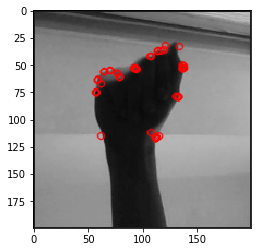

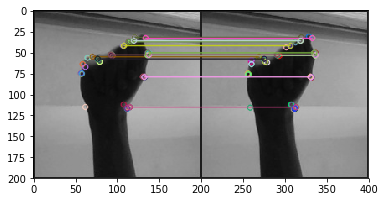

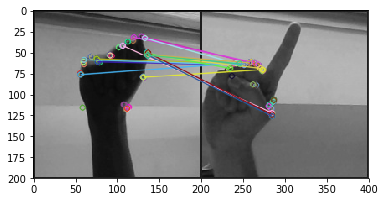

(<matplotlib.image.AxesImage at 0x1eddf9f5c88>, None)

In [43]:
%time

# initiate STAR Detector
orb = cv2.ORB_create()

# read in two images for ORB testing
img = cv2.imread('Dataset/asl_alphabet_train/A/A1.jpg', 0)
img2 = cv2.imread('Dataset/asl_alphabet_train/A/A2.jpg', 0)
img3 = cv2.imread('Dataset/asl_alphabet_train/Z/Z1.jpg', 0)

# find key points and compute descriptors
kp1, des1 = orb.detectAndCompute(img, None)
kp2, des2 = orb.detectAndCompute(img2, None)
kp3, des3 = orb.detectAndCompute(img3, None)

# draw keypoints location
kpimg = cv2.drawKeypoints(img, kp1, img, color=(255,0,0), flags=0)
plt.imshow(kpimg),plt.show()

# create brute force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# match descripters computed for image 1 and 2 (same sign)
matches = bf.match(des1, des2)

# sort matches by distance
matches = sorted(matches, key=lambda x:x.distance)

# draw first 15 matches
img = cv2.drawMatches(img, kp1, img2, kp2, matches[:15], img, flags=0)
plt.imshow(img),plt.show()

# match descripter computed for image 2 and 3 (one with no sign)
matches2 = bf.match(des2, des3)
matches2 = sorted(matches, key=lambda x:x.distance)
img2 = cv2.drawMatches(img2, kp2, img3, kp3, matches[:15], img2, flags=0)
plt.imshow(img2),plt.show()

The above code is an example of using ORB to get the keypoints of an image and compare to other images. The second image shows the key points on two images of the same sign whereas the third picture shows the matching keypoints on different signs.

In [ ]:
# helper function for sampling images for training
def sample_directories(num_samples, directory):
    file_sample = []
    target = []
    for root, dirs, files in os.walk(directory):
        for dir in dirs:
            for sample in random.sample(os.listdir(root+dir+'/'), num_samples):
                file_sample.append(root+dir+'/'+sample)
                target.append(dir)
    return file_sample, target

# training data
images, target = sample_directories(100, 'Data/asl_alphabet_train/')

print('I have {} images and {} targets in my training data'.format(len(images), len(target)))

# class to hold ORB keypoints and descriptors
class ImageORB:
    def __init__(self, img, kp, des):
        self.img = img
        self.kp = kp
        self.des = des
        
    def matches(self, des):
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
        return bf.knnMatch(self.des, des, k=5)
    
    def getdes(self):
        return self.des
    
class ImageTest(ImageORB):
    def __init__(self, img, kp, des):
        super().__init__(img, kp, des)  
        
    def setDistance(self, distance):
        self.distance = distance
        
    def BestMatch(self, bestmatch):
        self.bestmatch = bestmatch

I have 2600 images and 2600 targets in my training data

The above code samples 100 images from each letter of the training data set and the corresponding target vector for the samples is generated. It also sets up and container class to hold all of the ORB keypoints and descriptors generated for each image.

In [ ]:
# compute key points and descripters for each image

max_des_shape = 0

# training images
training_images = []
for image in images:
    img = cv2.imread(image, 0)
    kp, des = orb.detectAndCompute(img, None)
    if des.shape[0] * des.shape[1] > max_des_shape:
        max_des_shape = des.shape[0]*des.shape[1]
    training_images.append(ImageORB(img, kp, des))
    
# test images   
test_images = []
for root, dirs, files in os.walk('Data/asl_alphabet_test/'):
    for file in files:
        test_images.append(root+file)
       
test_img_objs = []
for test_img in test_images:
    img = cv2.imread(test_img, 0)
    kp, des = orb.detectAndCompute(img, None)
    if des.shape[0] * des.shape[1] > max_des_shape:
        max_des_shape = des.shape[0]*des.shape[1]
    test_img_objs.append(ImageTest(img, kp, des))

# build training set array
training_data = np.empty((1, max_des_shape), dtype=float)
# flatten all des and reshape into single row
for image in training_images:
    des = image.getdes()
    desf = des.flatten()
    despad = np.lib.pad(desf, (0, max_des_shape-desf.shape[0]), 'constant')
    desarr = np.array([despad])    
    training_data = np.vstack((training_data, desarr))

training_data = np.delete(training_data, 0, 0)
 
# build test set array
test_data = np.empty((1, max_des_shape), dtype=float)
for image in test_img_objs:
    des = image.getdes()
    desf = des.flatten()
    despad = np.lib.pad(desf, (0, max_des_shape-desf.shape[0]), 'constant')
    desarr = np.array([despad])    
    test_data = np.vstack((test_data, desarr))

test_data = np.delete(test_data, 0, 0)

The above code iterates through the training and test images and generates the key points and descriptors for each image. The descriptors are returned in an array in the shape of (Number of Key Points, 128). Because the number of key points varies between images, it was necessary to flatten and reshape the array into a single row of shape (1, max(number of keypoints) * 128) so that the array could be used with the KNN Classifier.

In [ ]:
# use knn classifier to predict image
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier(n_neighbors=3)
nn.fit(training_data, target)
predictions = nn.predict(test_data)

The reshaped array is used as the training set for the KNN Classifier and the target labels generated generated earlier are used for the target. The test data matrix generated earlier is then used to preict the sign displayed in the image. The number of neighbors was set to three as that seemed to maximize the accuracy of the prediction. Adjusting this up or down resulted in the accuracy dropping to ~23-25%.

In [ ]:
# get labels from test image set
def gettestimagelabels():
    labels = []
    for image in test_images:
        labels.append(str.split(os.path.splitext(os.path.basename(image))[0], '_')[0])
    return labels

# compute accuracy
def calcpredictionaccuracy(predictions):
    matches = 0
    labels = gettestimagelabels()
    for i in range(len(labels)):
        if labels[i] == predictions[i]:
            matches+=1
    return matches/len(labels)
        
print('Accuracy of Predictor was {:0.2f}'.format(calcpredictionaccuracy(predictions)))

Accuracy of Predictor was 0.31

The accuracy of this classifier is terrible. This can be attributed ot the variance in the number of descriptors generated in the ORB feature detection. Overall, ORB is a good way of looking at similar features between sets of images, however, the KNN classifier is not a good classifer for images with features extracted in with ORB. Accuracy should be improved by using a brute force method.

In [ ]:
# brute force classifier

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

predictions = []
for i in range(len(test_img_objs)):
    currentPrediction = ''
    currentMatches = []
    # large number to ensure it get updated
    currentMean = 10000
    for j in range(len(training_images)):
        matches = bf.match(test_img_objs[i].getdes(), training_images[j].getdes())
        matches = sorted(matches, key = lambda x:x.distance)
        if len(currentMatches) == 0:
            currentPrediction = target[j]
            currentMatches = matches
            msum = 0
            for match in matches:
                msum+=match.distance
            currentMean = msum/len(matches)
            continue
        # must be at least 15 matches
        elif len(matches) < 15:
            continue
        else:
            msum = 0
            for match in matches:
                msum+=match.distance
            mmean = msum/len(matches)
            if mmean < currentMean:
                currentPrediction = target[j]
                currentMatches = matches
                currentMean = mmean
    predictions.append(currentPrediction)
            
print('Accuracy of brute force method to find closest match: {:0.2f}'.format(calcpredictionaccuracy(predictions)))

Accuracy of brute force method to find closest match: 0.96

Using a brute force method for finding the closest match increased the accuracy of the predictions to 96%. Although this worked fairly well for a small dataset such as this one, this is not a scalable solution for large datasets.

### **5. References**

Kaggle Inc. (2019) ASL ALphabet. http://www.sorensonvrs.com/svrs

Sorenson Video Relay Service (SVRS) (2019). http://www.sorensonvrs.com/svrs 

Start ASL. (2008-2019). https://www.startasl.com/american-sign-language
